## **Scikit Learn Prediction implementation**
In this regression problem, we will predict the percentage of expected scores based on the amount of time a student has studied. This is a simple linear regression problem because it involves only two variables.

<div class="alert alert-block alert-success">
<b>Importing libraries:</b>
</div>

In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, mean_absolute_percentage_error

<div class="alert alert-block alert-warning">
<b>Function:</b>    Dataframe reader 
</div>

In [77]:
def readData(url):
    try:
        df = pd.read_csv(url)
        print("Data imported successfully")
        print(df.head())
        return df
    except Exception as e:
        print(e)

In [78]:
data = readData("http://bit.ly/w-data")

Data imported successfully
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Text(0.5, 1.0, 'Number of hours vs Scores')

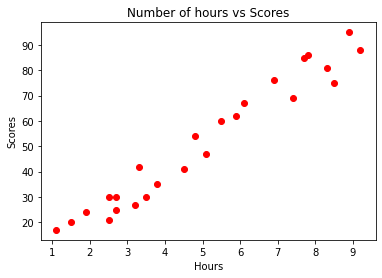

In [79]:
plt.scatter(data.Hours, data.Scores,color = 'red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Number of hours vs Scores")

<h3>Selecting 75% of the data for tranining and 25% for testing<h3>

In [80]:
 
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1].values,data.iloc[:,1].values,test_size=0.25, random_state=0) 

In [81]:
reg = lr()
reg.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred = reg.predict(X_test)

In [83]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [84]:
hours = 9.25
own_pred = reg.predict(np.array([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


# Performance evaluation

#### The whole documentation for the evaluation metrics could be found below

##### https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [85]:
def evaluate_model(y_test,y_pred):
    try:
        _explained_variance_score = explained_variance_score(y_test,y_pred,multioutput='raw_values')
        _maxError = max_error(y_test,y_pred)
        _mean_squared_error = mean_squared_error(y_test, y_pred)
        _mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
        print("explained_variance_score = {}".format(_explained_variance_score))
        print("max_error = {}".format(_maxError))
        print("mean_squared_error = {}".format(_mean_squared_error))
        print("mean_absolute_percentage_error = {}".format(_mean_absolute_percentage_error))
    except Exception as e:
        print(e)


In [86]:
evaluate_model(y_test, y_pred)

explained_variance_score = [0.93987372]
max_error = 6.745574939513553
mean_squared_error = 20.33292367497997
mean_absolute_percentage_error = 0.1283906350228135
